In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import json

file_name = "data/greenpaper_price.json"

with open(file_name, "r") as file:
    content = file.read()
    
json_content = json.loads(content)

# json_content[0]["prices"][index]["date"][0:10]

dates = [int(index) for index in range(0, len(json_content[0]["prices"]))]
prices = [float(json_content[0]["prices"][index]["price"][0:10]) for index in range(0, len(json_content[0]["prices"]))]

In [2]:
def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates), 1))
    
    svr_lin = SVR(kernel= 'linear', C=1e3)
    svr_poly = SVRa(kernel= 'poly', C=1e3, degree = 2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
    plt.plot(dates, svr_poly.predict(dates), color='blue', label='Polynomial model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


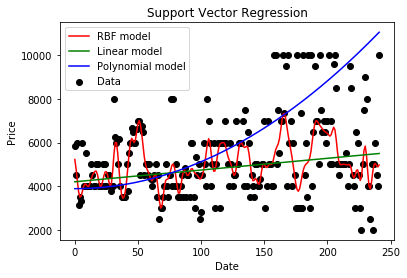

In [3]:
predict_price = predict_prices(dates, prices, [[243]])

In [4]:
predict_price

(5205.304790647569, 5510.448387135679, 11171.58816697578)